## Modeling the Relationship Between PM2.5 Air Pollution, Socio-Demographics, and COVID-19 Mortality

This section investigates how long-term exposure to ambient PM₂.₅ (2010–2019) and country-level socio-demographic development (SDI, 2020) are associated with COVID-19 mortality rates (2020).

We explore the following modeling steps:

1. **Multiple Linear Regression (MLR):**  
   A baseline model to assess the independent effects of PM₂.₅ and SDI on COVID-19 death rates across countries.

2. **Log-Transformed Regression:**  
   Log-transformed the outcome variable to improve normality and interpretability.

3. **Interaction Model (PM₂.₅ × SDI):**  
   To test whether the effect of PM₂.₅ varies by socio-demographic development, we added an interaction term.

4. **Interaction Plot by SDI Groups:**  
   We grouped countries into Low, Medium, and High SDI levels and visualized how PM₂.₅ relates to COVID-19 mortality in each group.

Each step is supported with diagnostic plots and interpretation, culminating in a deeper understanding of how environmental and demographic factors may jointly shape pandemic outcomes.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_covid = pd.read_csv("../1_datasets/final_datasets/final_merged_covid_pm25_sdi.csv")
df = df_covid.copy()
# Preview
df.head()

,Country,COVID_Deaths_Rate,upper,lower,Mean_PM25_2010_2019,Year,SDI_mean_value
0,Lao People's Democratic Republic,6.867837e-11,6.867837e-11,6.867837e-11,21.164,2020,0.484193
1,Sri Lanka,2.820345e+00,2.820345e+00,2.820345e+00,23.948,2020,0.697649
2,Fiji,8.084884e+00,1.685940e+01,2.008246e+00,7.272,2020,0.671431
3,Samoa,2.370317e-09,2.370317e-09,2.370317e-09,7.623,2020,0.590075
4,Malaysia,1.516114e+00,2.286782e+00,8.061217e-01,21.670,2020,0.738744


In [3]:
df = df.rename(
    columns={
        "Mean_PM25_2010_2019": "PM25_avg",
        "SDI_mean_value": "SDI",
    }
)

### Multiple Linear Regression (MLR)
To evaluate whether long-term exposure to PM₂.₅ (2010–2019) and socio-demographic development index (SDI, 2020) are associated with COVID-19 mortality rates at the country level using a multiple linear regression model.

In [4]:
X = df[["PM25_avg", "SDI"]]  # Predictor variables
y = df["COVID_Deaths_Rate"]  # Target variable

# Add intercept term to X
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      COVID_Deaths_Rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.178
Date:                Tue, 15 Jul 2025   Prob (F-statistic):              0.116
Time:                        13:17:36   Log-Likelihood:                -1040.8
No. Observations:                 190   AIC:                             2088.
Df Residuals:                     187   BIC:                             2097.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8884     20.564      1.259      0.2

**Model Overview:**  
A multiple linear regression was performed to assess the association between long-term PM₂.₅ exposure (2010–2019), socio-demographic index (SDI, 2020), and COVID-19 death rates across 190 countries.

**Key Results:**
- **R-squared:** 0.023  
  Only 2.3% of the variance in COVID-19 death rates is explained by PM₂.₅ and SDI together, indicating a very weak model fit.
- **PM₂.₅ coefficient:** 0.56 (p = 0.077)  
  Suggests a positive association, but not statistically significant at the 0.05 level.
- **SDI coefficient:** 42.71 (p = 0.101)  
  Also not statistically significant.
- **Intercept:** 25.89 (p = 0.210)  
  Not statistically significant.

**Model Diagnostics:**
- **F-statistic p-value:** 0.116  
  The overall model is not statistically significant.
- **Residuals:** Show non-normality (Omnibus p < 0.001, skew = 0.98, kurtosis = 3.90).

**Conclusion from this model:**  
Neither long-term PM₂.₅ exposure nor SDI are significant predictors of COVID-19 death rates at the country level in this model. The very low R-squared and lack of statistical significance suggest that other factors are likely more important in explaining differences in COVID-19 mortality across countries. The results highlight the complexity of pandemic outcomes and the limitations of using only environmental and socio-demographic predictors.



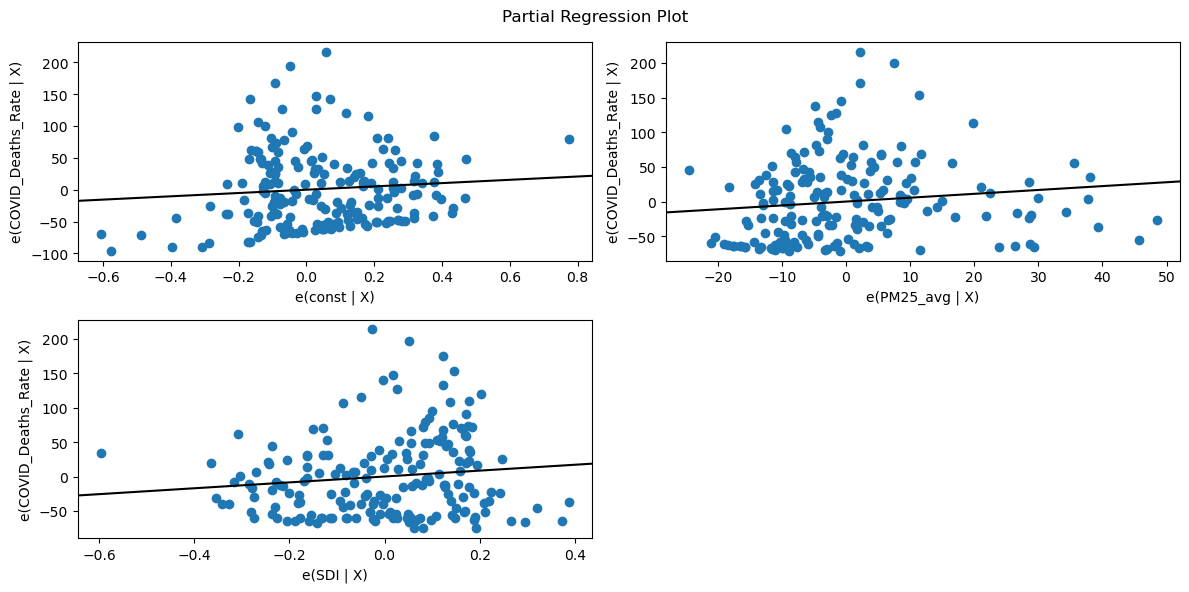

In [5]:
# Plot partial regression plots
fig = plt.figure(figsize=(12, 6))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

### Partial Regression Plots: COVID-19 Death Rate vs. PM₂.₅ and SDI

**What the Plots Show:**  
Partial regression plots (also known as added variable plots) visualize the unique relationship between each predictor and the outcome, after accounting for the other predictors in the model.

- **Top Right (PM₂.₅):**  
  The plot shows the relationship between the residuals of COVID-19 death rate (after removing the effect of SDI) and the residuals of PM₂.₅ (after removing the effect of SDI). The regression line is nearly flat, indicating a very weak positive association between PM₂.₅ and COVID-19 death rate, after controlling for SDI.

- **Bottom Left (SDI):**  
  This plot shows the relationship between the residuals of COVID-19 death rate (after removing the effect of PM₂.₅) and the residuals of SDI (after removing the effect of PM₂.₅). Again, the regression line is nearly flat, indicating a very weak positive association between SDI and COVID-19 death rate, after controlling for PM₂.₅.

- **Top Left (Intercept):**  
  This plot is less interpretable in a substantive sense, as it represents the effect of the intercept.

**Key Insights:**
- Both PM₂.₅ and SDI show only a slight, positive, and non-significant relationship with COVID-19 death rates after adjusting for each other.
- The scatter of points is wide and the regression lines are nearly flat, visually confirming the weak associations and low explanatory power found in the regression summary.
- There is substantial variability in COVID-19 death rates that is not explained by either PM₂.₅ or SDI.

**Conclusion:**  
The partial regression plots reinforce the regression results: neither long-term PM₂.₅ exposure nor socio-demographic development index (SDI) are strong or significant predictors of COVID-19 death rates at the country level, after accounting for each other.


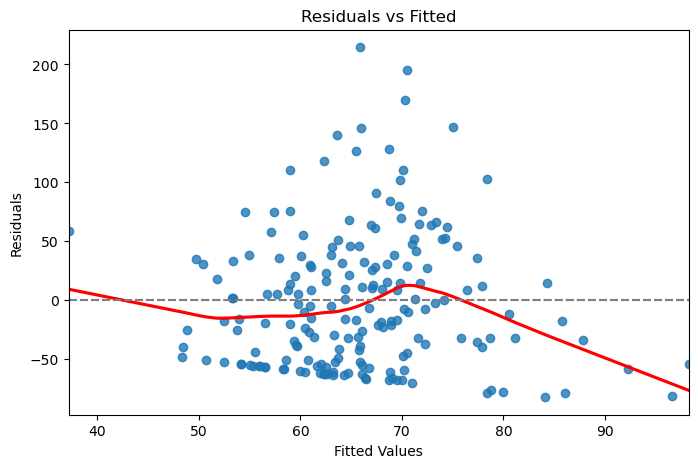

In [6]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={"color": "red"})
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

### Residuals vs. Fitted Plot: Model Diagnostics

**What the Plot Shows:**  
This plot displays the residuals (differences between observed and predicted COVID-19 death rates) against the fitted values from the regression model. The red line is a LOWESS (locally weighted scatterplot smoothing) curve, which helps visualize any systematic patterns in the residuals.

**Key Observations:**
- **No clear linear pattern:** The residuals are scattered above and below zero, which is generally desirable.
- **Non-constant variance (heteroscedasticity):** The spread of residuals appears to increase for mid-range fitted values and decrease for higher fitted values. This "fan" or "cone" shape suggests that the variance of the errors is not constant across all levels of the predicted values.
- **Non-linearity:** The red LOWESS line is not flat; it curves upward and then sharply downward at higher fitted values. This suggests that the linear model may not fully capture the relationship between predictors and the outcome, and that there may be some non-linear effects or outliers influencing the fit.
- **Potential outliers:** There are several points with large positive or negative residuals, indicating countries where the model's predictions are far from the observed values.

**Conclusion:**  
The residuals vs. fitted plot indicates potential issues with heteroscedasticity and non-linearity in the model. This means that the assumptions of ordinary least squares regression (constant variance and linearity) may not be fully met. The presence of outliers and the non-flat LOWESS line suggest that the model could be improved, possibly by transforming variables, adding non-linear terms, or using robust regression techniques.


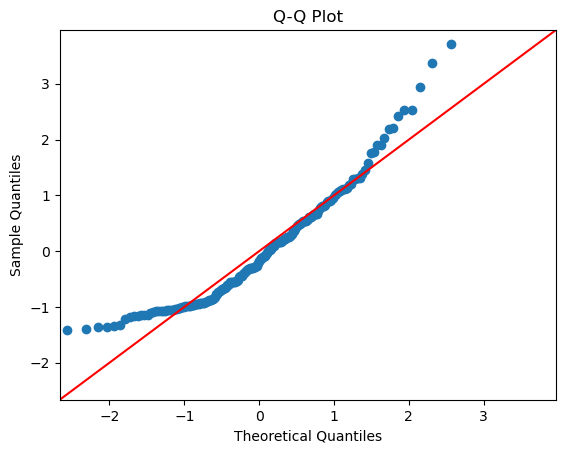

In [7]:
sm.qqplot(residuals, line="45", fit=True)
plt.title("Q-Q Plot")
plt.show()

### Q-Q Plot: Normality of Residuals

**What the Plot Shows:**  
A Q-Q (quantile-quantile) plot compares the distribution of the model residuals to a theoretical normal distribution. If the residuals are normally distributed, the points should fall approximately along the red reference line.

**Key Observations:**
- **Central points:** Most of the points in the middle of the plot lie close to the red line, indicating that the central portion of the residuals is approximately normally distributed.
- **Deviations in the tails:** The points at both the upper and lower ends deviate from the line, especially in the upper tail (right side), where the points rise above the line. This suggests the presence of positive skewness and heavier tails than expected under normality (leptokurtosis).
- **Mild to moderate non-normality:** While the deviations are not extreme, the pattern indicates that the residuals are not perfectly normal, particularly in the tails.

**Conclusion:**  
The Q-Q plot suggests that the residuals from the regression model are approximately normal in the center but show some departure from normality in the tails, with evidence of positive skewness and heavier upper tail. This is consistent with the earlier diagnostic statistics (e.g., skewness and kurtosis from the regression output).

**Implications:**  
- Mild non-normality in the residuals is common in real-world data and may not severely impact inference if the sample size is large.
- However, the presence of skewness and heavy tails can affect the reliability of hypothesis tests and confidence intervals.
- Combined with earlier evidence of heteroscedasticity and outliers, this suggests that model assumptions are not fully met.


### Log-Transformed Regression
**Why Use a Log Transformation for COVID-19 Death Rate?**

**Rationale:**
- **Skewed Distribution:**  
  COVID-19 death rates across countries are often highly right-skewed, with most countries having low to moderate rates and a few countries experiencing very high rates. This violates the normality assumption of linear regression, which expects the residuals (errors) to be normally distributed.

- **Stabilizing Variance (Homoscedasticity):**  
  In the original model, the residuals vs. fitted plot showed evidence of heteroscedasticity (non-constant variance), where the spread of residuals increased with higher fitted values. Log transformation helps stabilize the variance, making the model’s errors more consistent across all levels of the predicted values.

- **Reducing Influence of Outliers:**  
  Extreme values (outliers) in the death rate can disproportionately influence the regression results. Log transformation compresses the scale of large values, reducing their impact and making the model more robust.

- **Interpretability:**  
  With a log-transformed outcome, regression coefficients can be interpreted as approximate percentage changes in the original scale, which is often more meaningful for rates and ratios.

In [8]:
df["log_death_rate"] = np.log1p(df["COVID_Deaths_Rate"])

In [9]:
# Reuse X from earlier
X = sm.add_constant(df[["PM25_avg", "SDI"]])
y_log = df["log_death_rate"]

# Fit the new model
model_log = sm.OLS(y_log, X).fit()

# Show the results
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:         log_death_rate   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     6.177
Date:                Tue, 15 Jul 2025   Prob (F-statistic):            0.00252
Time:                        13:17:44   Log-Likelihood:                -359.83
No. Observations:                 190   AIC:                             725.7
Df Residuals:                     187   BIC:                             735.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2839      0.571      4.001      0.0

### Regression Results After Log-Transforming COVID-19 Death Rate

**Model Overview:**  
A multiple linear regression was performed using the natural log of (1 + COVID-19 death rate) as the dependent variable, with PM₂.₅ (2010–2019) and SDI (2020) as predictors.

**Key Results:**
- **R-squared:** 0.062  
  The model explains about 6.2% of the variance in the log-transformed COVID-19 death rate, which is an improvement over the untransformed model but still indicates a weak fit.
- **PM₂.₅ coefficient:** 0.031 (p = 0.001)  
  This coefficient is statistically significant. It suggests that, holding SDI constant, a 1 µg/m³ increase in PM₂.₅ is associated with an approximate 3.1% increase in the COVID-19 death rate (since the dependent variable is log-transformed, the coefficient can be interpreted as a percent change for small values).
- **SDI coefficient:** 0.70 (p = 0.33)  
  Not statistically significant, indicating no clear association between SDI and the log-transformed COVID-19 death rate after adjusting for PM₂.₅.
- **Intercept:** 2.28 (p < 0.001)  
  Statistically significant, but mainly serves as a baseline for interpretation.

**Model Diagnostics:**
- **F-statistic p-value:** 0.0025  
  The overall model is statistically significant.
- **Residuals:** Still show some non-normality (Omnibus p < 0.001, skew = -0.86), but kurtosis is closer to normal (2.54).

**Conclusion:**  
After log-transforming the COVID-19 death rate, the association between long-term PM₂.₅ exposure and COVID-19 mortality becomes statistically significant, though the effect size is modest and the overall model fit remains weak. SDI does not show a significant relationship with COVID-19 mortality in this model. These results suggest that higher long-term PM₂.₅ exposure may be associated with increased COVID-19 mortality at the country level, but much of the variation in mortality remains unexplained by these two predictors alone.

**Implications:**  
- The log transformation improved model fit and revealed a statistically significant relationship between PM₂.₅ and COVID-19 mortality.
- The lack of significance for SDI and the low R-squared indicate that other factors (e.g., age structure, healthcare capacity, policy response) are likely important determinants of COVID-19 mortality.

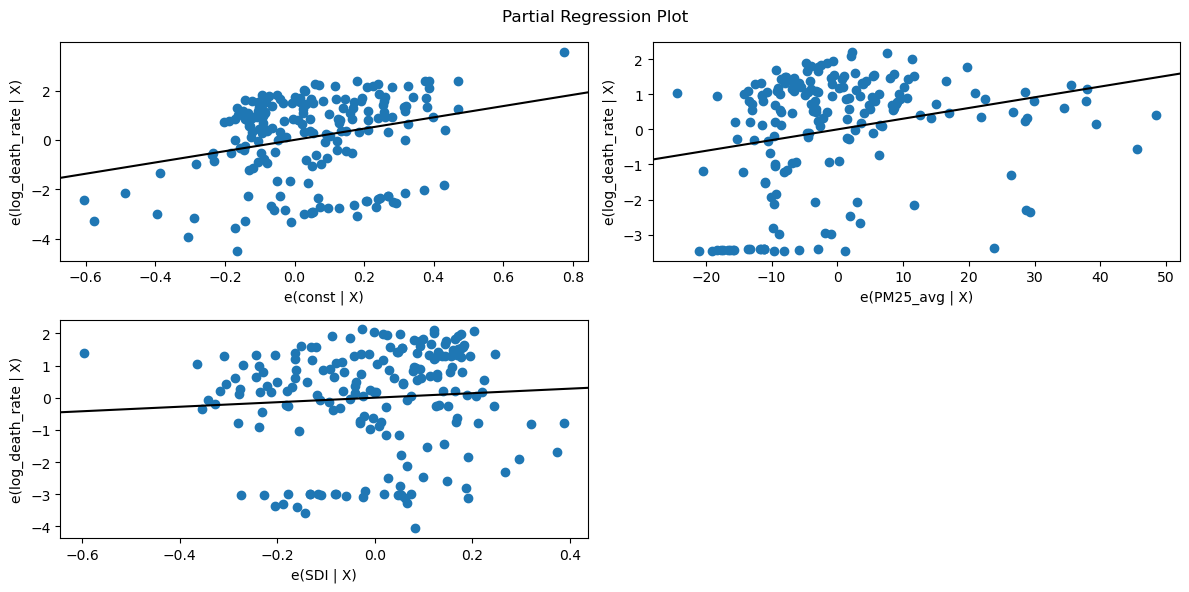

In [10]:
# Plot partial regression plots
fig = plt.figure(figsize=(12, 6))
sm.graphics.plot_partregress_grid(model_log, fig=fig)
plt.tight_layout()
plt.show()

### Partial Regression Plots (Log-Transformed Model)

**Description:**  
This figure displays partial regression plots (added variable plots) for the **log-transformed COVID-19 death rate model**, with predictors PM₂.₅ (2010–2019 average) and SDI (2020):

- **Top Right:** Shows the unique relationship between PM₂.₅ and the log-transformed COVID-19 death rate, after accounting for SDI.
- **Bottom Left:** Shows the unique relationship between SDI and the log-transformed COVID-19 death rate, after accounting for PM₂.₅.
- **Top Left:** Represents the effect of the intercept (not substantively interpretable).

Each point represents a country, and the black line shows the best linear fit for the partial relationship.

**Key Insights:**
- **PM₂.₅ (Top Right):**  
  The regression line has a slight positive slope, indicating a weak positive association between PM₂.₅ and the log-transformed COVID-19 death rate after adjusting for SDI. However, the scatter is wide, and many points deviate from the line, reflecting high variability and a weak relationship.
- **SDI (Bottom Left):**  
  The regression line is nearly flat, suggesting little to no association between SDI and the log-transformed COVID-19 death rate after adjusting for PM₂.₅. The data points are widely dispersed, further indicating a lack of strong relationship.
- **General Pattern:**  
  In both plots, the wide scatter of points around the regression lines visually confirms that neither PM₂.₅ nor SDI alone explains much of the variation in COVID-19 mortality, after accounting for the other variable.

**Conclusions:**  
- Both PM₂.₅ and SDI show only weak, non-robust associations with the log-transformed COVID-19 death rate at the country level, after adjusting for each other.
- The substantial spread of points around the regression lines indicates that much of the variation in COVID-19 mortality remains unexplained by these two predictors.
- These plots reinforce the regression results for the log-transformed model: while there may be a statistically significant association for PM₂.₅, the effect is small, and the overall model fit is weak. SDI does not appear to be a significant predictor in this context.
- Additional variables and/or more complex modeling approaches are likely needed to better explain cross-country differences in COVID-19 mortality.

**Implications:**  
The partial regression plots for the **log-transformed model** show that, after accounting for each other, PM₂.₅ and SDI have only weak and inconsistent relationships with COVID-19 mortality, supporting the conclusion that other factors play a much larger role in explaining the observed variation across countries.

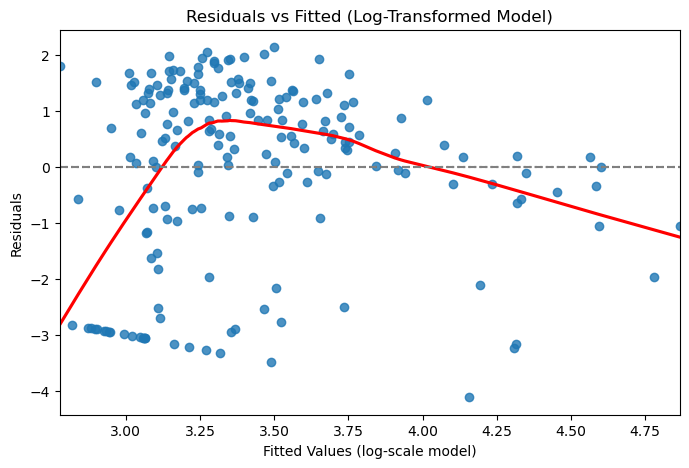

In [11]:
residuals_log = model_log.resid
fitted_log = model_log.fittedvalues

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_log, y=residuals_log, lowess=True, line_kws={"color": "red"})
plt.axhline(0, linestyle="--", color="gray")
plt.xlabel("Fitted Values (log-scale model)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Log-Transformed Model)")
plt.show()

### Residuals vs. Fitted Plot: Log-Transformed Model

**What the Plot Shows:**  
This plot displays the residuals (differences between observed and predicted log-transformed COVID-19 death rates) against the fitted values from the log-transformed regression model. The red line is a LOWESS (locally weighted scatterplot smoothing) curve, which helps visualize any systematic patterns in the residuals.

**Key Observations:**
- **Improved variance:** Compared to the untransformed model, the spread of residuals is more consistent across the range of fitted values, indicating improved homoscedasticity (constant variance).
- **Non-linearity remains:** The LOWESS line is not perfectly flat, especially at the lower and higher ends of the fitted values. There is a noticeable curve, suggesting some remaining non-linearity or model misspecification.
- **Potential outliers:** There are still a few points with large negative residuals, indicating that the model underestimates the log death rate for some countries.
- **No strong funnel shape:** The absence of a "fan" or "cone" shape suggests that the log transformation has helped address heteroscedasticity, though still not perfectly.

**Conclusion:**  
The log transformation has improved the model’s residual diagnostics, particularly by stabilizing the variance of the residuals. However, some non-linearity and outliers remain, as indicated by the curved LOWESS line and a few extreme residuals. This suggests that while the log transformation was beneficial, the model could potentially be further improved by exploring non-linear terms, additional predictors, or robust regression techniques.

Overall, the log transformation has made the model more appropriate for inference, but further refinement may yield even better results.

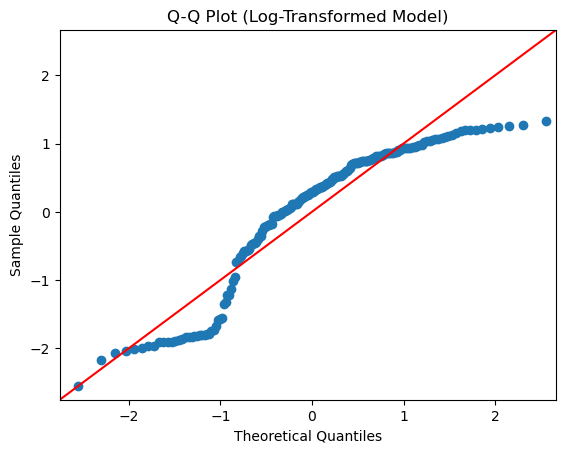

In [12]:
sm.qqplot(residuals_log, line="45", fit=True)
plt.title("Q-Q Plot (Log-Transformed Model)")
plt.show()

### Q-Q Plot: Log-Transformed Model Residuals

**What the Plot Shows:**  
This Q-Q (quantile-quantile) plot compares the distribution of the residuals from the log-transformed regression model to a theoretical normal distribution. If the residuals are normally distributed, the points should fall along the red reference line.

**Key Observations:**
- **Central fit:** The central portion of the residuals aligns reasonably well with the red line, indicating approximate normality in the middle of the distribution.
- **Deviations in the tails:** There are noticeable departures from the line at both the lower and upper ends tails, with the lower tail (left side) showing a step-like pattern and the upper tail (right side) curving away from the line. This suggests some remaining non-normality, particularly in the tails.
- **Improvement over untransformed model:** The log transformation has reduced the skewness and brought the residuals closer to normality compared to the original model, but some issues persist.

**Conclusion:**  
The Q-Q plot indicates that the residuals from the log-transformed model are closer to normality, especially in the center of the distribution. However, there are still deviations in the tails, suggesting mild to moderate non-normality remains. This is a common outcome in real-world data and is generally less concerning with larger sample sizes, but it may still affect the accuracy of p-values and confidence intervals.

**Implications:**  
- The log transformation has improved the normality of residuals, supporting the use of the model for inference.
- Some caution is still warranted when interpreting statistical significance, especially for extreme values.


The residuals more normal, but some non-normality in the tails remains.

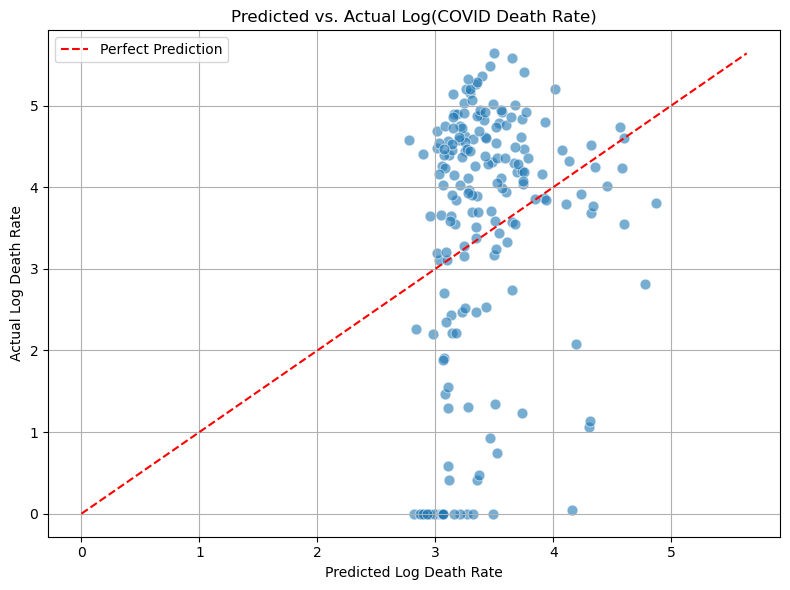

In [13]:
# Extract predicted values and actual log death rates
predicted_log = model_log.fittedvalues
actual_log = df["log_death_rate"]

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_log, y=actual_log, alpha=0.6, s=60)
plt.plot(
    [actual_log.min(), actual_log.max()],
    [actual_log.min(), actual_log.max()],
    "r--",
    label="Perfect Prediction",
)

plt.xlabel("Predicted Log Death Rate")
plt.ylabel("Actual Log Death Rate")
plt.title("Predicted vs. Actual Log(COVID Death Rate)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Predicted vs. Actual Log(COVID Death Rate)

**What the Plot Shows:**  
This scatter plot compares the predicted log-transformed COVID-19 death rates from the regression model to the actual observed values for each country. The red dashed line represents perfect prediction, where predicted values would exactly match the actual values.

**Key Observations:**
- **Spread around the line:** Most points are clustered around the perfect prediction line, but there is substantial scatter, especially for higher actual values. This indicates that while the model captures some of the variation, its predictions are not highly precise.
- **Vertical spread:** The vertical spread of points at each predicted value shows that the model’s predictions have considerable error, with many actual values deviating from the predicted ones.
- **Clustering:** There is a noticeable cluster of points at lower actual log death rates, suggesting that the model may systematically underpredict or overpredict for certain countries.
- **Model fit:** The plot visually confirms the modest R-squared value (~0.06), indicating that the model explains only a small portion of the variance in the log-transformed death rates.

**Conclusion:**  
The model’s predictions of log-transformed COVID-19 death rates are only moderately aligned with the actual observed values. While the model captures some general trends, there is substantial unexplained variation, and predictions for individual countries can be quite imprecise. This is consistent with the low R-squared and the diagnostic plots, which suggest that additional predictors or more complex modeling may be needed to improve predictive accuracy.

**Implications:**  
- The model is useful for identifying broad patterns and statistically significant associations (e.g., between PM₂.₅ and COVID-19 mortality), but it should not be relied upon for precise prediction at the country level.
- Further model refinement, including the addition of exploration of non-linear relationships, may improve predictive performance.

The plot highlights both the strengths and limitations of the current model in explaining cross-country variation in COVID-19 mortality.

In [14]:
# 2. Interaction Effects Model

import statsmodels.formula.api as smf

# Using R-style formula
model = smf.ols("log_death_rate ~ PM25_avg * SDI", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_death_rate   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     4.729
Date:                Tue, 15 Jul 2025   Prob (F-statistic):            0.00333
Time:                        13:17:49   Log-Likelihood:                -358.92
No. Observations:                 190   AIC:                             725.8
Df Residuals:                     186   BIC:                             738.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2854      0.940      1.367   

### Interaction Effects Model: PM₂.₅ × SDI on Log(COVID-19 Death Rate)

**Model Overview:**  
A multiple linear regression was performed to assess whether the effect of long-term PM₂.₅ exposure on the log-transformed COVID-19 death rate depends on a country's socio-demographic index (SDI). The model includes main effects for PM₂.₅ and SDI, as well as their interaction term.

**Key Results:**
- **R-squared:** 0.071  
  The model explains about 7.1% of the variance in the log-transformed COVID-19 death rate, a slight improvement over the model without interaction.
- **PM₂.₅ coefficient:** 0.069 (p = 0.023)  
  Statistically significant. Indicates that, at SDI = 0, a 1 µg/m³ increase in PM₂.₅ is associated with a 6.9% increase in the log death rate.
- **SDI coefficient:** 2.22 (p = 0.100)  
  Not statistically significant. Represents the effect of SDI when PM₂.₅ = 0.
- **Interaction (PM₂.₅ × SDI):** -0.062 (p = 0.184)  
  Not statistically significant. Suggests that the effect of PM₂.₅ on COVID-19 mortality may decrease as SDI increases, but this effect is not strong enough to be conclusive.
- **Intercept:** 1.29 (p = 0.173)  
  Not statistically significant.

**Model Diagnostics:**
- **F-statistic p-value:** 0.0033  
  The overall model is statistically significant.
- **Residuals:** Still show some non-normality (skew = -0.81, kurtosis = 2.50), but this is not severe.

**Conclusion:**  
Including the interaction term between PM₂.₅ and SDI slightly improves the model’s explanatory power. The main effect of PM₂.₅ remains statistically significant, indicating a positive association with COVID-19 mortality. However, the interaction term is not statistically significant, suggesting there is no strong evidence that the effect of PM₂.₅ on COVID-19 mortality differs by SDI level. SDI itself also remains a non-significant predictor in this model.

**Implications:**  
- The positive association between PM₂.₅ and COVID-19 mortality is robust to the inclusion of an interaction with SDI.
- There is no clear evidence that socio-demographic development modifies the impact of air pollution on COVID-19 mortality at the country level.
- The model still explains only a small portion of the variance, indicating that other factors are likely important.

Overall, the interaction model supports the finding that higher long-term PM₂.₅ exposure is associated with increased COVID-19 mortality, but this relationship does not appear to be strongly modified by SDI.

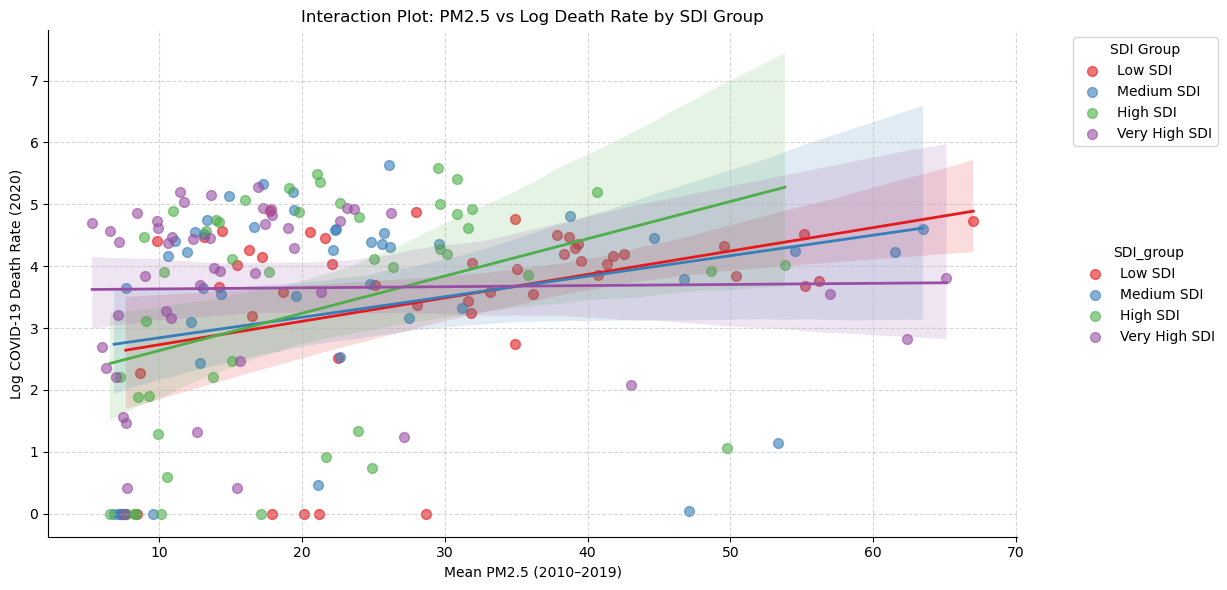

In [15]:
# Add SDI group label
df["SDI_group"] = pd.qcut(
    df["SDI"], q=4, labels=["Low SDI", "Medium SDI", "High SDI", "Very High SDI"]
)

# Plot with improvements
sns.lmplot(
    x="PM25_avg",
    y="log_death_rate",
    hue="SDI_group",
    data=df,
    height=6,
    aspect=1.5,
    scatter_kws={"alpha": 0.6, "s": 50},
    line_kws={"linewidth": 2},
    palette="Set1",
)
plt.title("Interaction Plot: PM2.5 vs Log Death Rate by SDI Group")
plt.xlabel("Mean PM2.5 (2010–2019)")
plt.ylabel("Log COVID-19 Death Rate (2020)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend(title="SDI Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Interaction Plot: PM₂.₅ vs. Log COVID-19 Death Rate by SDI Group

**Description:**  
This plot illustrates the relationship between long-term ambient PM₂.₅ exposure (2010–2019) and the log-transformed COVID-19 death rate (2020), stratified by socio-demographic index (SDI) group. Each point represents a country, colored by its SDI group (Low, Medium, High, Very High). The solid lines show the fitted regression line for each SDI group, with shaded areas representing 95% confidence intervals.

**Key Insights:**
- **Positive Association:**  
  Across all SDI groups, there is a positive association between PM₂.₅ exposure and log COVID-19 death rate, as indicated by the upward slopes of the regression lines.
- **Similar Slopes:**  
  The slopes of the regression lines are broadly similar across SDI groups, suggesting that the effect of PM₂.₅ on COVID-19 mortality does not differ substantially by level of socio-demographic development. This visual finding is consistent with the regression analysis, where the interaction term between PM₂.₅ and SDI was not statistically significant.
- **Within-Group Variability:**  
  There is considerable spread of data points within each SDI group, indicating high variability in COVID-19 mortality that is not explained by PM₂.₅ or SDI alone.
- **Confidence Intervals:**  
  The wide confidence intervals, especially at higher PM₂.₅ levels, reflect greater uncertainty in the estimated relationship in these ranges, likely due to fewer countries with very high PM₂.₅ exposure.

**Conclusion:**  
This interaction plot supports the finding that higher long-term PM₂.₅ exposure is associated with increased COVID-19 mortality at the country level, regardless of socio-demographic development. However, the substantial within-group variability and overlapping confidence intervals highlight the importance of other factors in explaining differences in COVID-19 mortality across countries.

**Implications:**  
- The effect of air pollution on COVID-19 mortality appears robust across different levels of development.
- Additional variables (e.g., age structure, healthcare capacity, policy response) should be considered to further explain cross-country differences in COVID-19 outcomes.

---

## 🧾 Comprehensive Summary: PM₂.₅, SDI, and COVID-19 Mortality

### Summary Table

| Model/Step                 | PM₂.₅ Significant? | SDI Significant? | Interaction Significant? | R²    | Model Fit | Assumptions Met? |
|----------------------------|-------------------|------------------|---------------------------|-------|-----------|------------------|
| Linear Regression          | No                | No               | N/A                       | 0.02  | Very weak | No               |
| Log-Transformed Regression | Yes (modest)      | No               | N/A                       | 0.06  | Weak      | Partially        |
| Interaction Model          | Yes (modest)      | No               | No                        | 0.07  | Weak      | Partially        |

---

### Key Takeaway
- After log-transforming the COVID-19 death rate, PM₂.₅ becomes a modest but statistically significant predictor of mortality.  
- SDI alone, and its interaction with PM₂.₅, are not statistically significant.
- The overall explanatory power of the models remains low (R² < 0.1), and assumptions such as normality and homoscedasticity are only partially met.

---

### Are We Confident?
- Statistical confidence is limited: PM₂.₅ shows significance, but with a small effect size.  
- Practical (predictive) confidence is low: The model explains only a small portion of the variation across countries.

---

### Null Hypothesis Decisions

| Variable           | Null Hypothesis                          | Decision           |
|--------------------|-------------------------------------------|--------------------|
| PM₂.₅              | No association with COVID-19 mortality    |  Reject (modest) |
| SDI                | No association with COVID-19 mortality    | Fail to reject  |
| PM₂.₅ × SDI        | No interaction effect                     | Fail to reject  |

---

### Should We Consider Machine Learning?
- Machine learning models (e.g., random forests, gradient boosting) may detect nonlinear effects or interactions missed by linear regression.
- However, with only two weak predictors, ML is unlikely to dramatically improve performance.
---



> There is modest statistical evidence that long-term PM₂.₅ exposure is associated with increased COVID-19 mortality across countries; however, the effect is small, SDI is not significant, and interaction effects are not supported. The model explains little of the outcome variability. Further analysis using machine learning is recommended, though interpretability may remain limited due to unmeasured confounding factors.

